1: You don't need to replicate every step we did with the new dataset. Just roughly follow the steps in the lab: Data Preparation, Data Transformation, Data Preprocessing, Data Exploration. Pretend you're preparing to actually use that dataset. Make sure you include the steps you need to include.


# Data Preparation

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

# suppress future warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import helpers.data_mining_helpers as dmh

reviews_yelp = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', sep="\t", names=['Sentence', 'Sentiment'])
reviews_yelp['Source'] = 'Yelp'

reviews_imdb = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', sep="\t", names=['Sentence', 'Sentiment'])
reviews_imdb['Source'] = 'IMDB'

reviews_amazon = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', sep="\t", names=['Sentence', 'Sentiment'])
reviews_amazon['Source'] = 'Amazon'

reviews = pd.concat([reviews_yelp, reviews_imdb, reviews_amazon]).reset_index(drop=True)

reviews['Sentiment']= reviews['Sentiment'].astype(str)
reviews

,Sentence,Sentiment,Source
0,Wow... Loved this place.,1,Yelp
1,Crust is not good.,0,Yelp
2,Not tasty and the texture was just nasty.,0,Yelp
3,Stopped by during the late May bank holiday of...,1,Yelp
4,The selection on the menu was great and so wer...,1,Yelp
...,...,...,...
2743,The screen does get smudged easily because it ...,0,Amazon
2744,What a piece of junk.. I lose more calls on th...,0,Amazon
2745,Item Does Not Match Picture.,0,Amazon
2746,The only thing that disappoint me is the infra...,0,Amazon


# Data Transformation

In [3]:
# dataframe and relevant columns already converted in above step
# doing some queries to become familiar with data

In [4]:
# query one random record
reviews.loc[1800]

Sentence     A usable keyboard actually turns a PDA into a ...
Sentiment                                                    1
Source                                                  Amazon
Name: 1800, dtype: object

In [5]:
# see whole sentence
reviews.loc[1800, 'Sentence']

'A usable keyboard actually turns a PDA into a real-world useful machine instead of just a neat gadget.'

In [6]:
# show every 100th record, to verify all sources are there
reviews.iloc[::100]

,Sentence,Sentiment,Source
0,Wow... Loved this place.,1,Yelp
100,Our server was fantastic and when he found out...,1,Yelp
200,"I had heard good things about this place, but ...",1,Yelp
300,Good beer & drink selection and good food sele...,1,Yelp
400,This one is simply a disappointment.,0,Yelp
500,I also had to taste my Mom's multi-grain pumpk...,1,Yelp
600,I miss it and wish they had one in Philadelphia!,1,Yelp
700,The chips that came out were dripping with gre...,0,Yelp
800,I'm super pissd.,0,Yelp
900,Spend your money elsewhere.,0,Yelp


In [7]:
# return every 5 sentences, show top 10
reviews.loc[::5, "Sentence"][:10]

0                              Wow... Loved this place.
5        Now I am getting angry and I want my damn pho.
10                             Service was very prompt.
15    I was shocked because no signs indicate cash o...
20                                  The Burrittos Blah!
25    That's right....the red velvet cake.....ohhh t...
30    Also there are combos like a burger, fries, an...
35    The only redeeming quality of the restaurant w...
40                         The shrimp tender and moist.
45    The only thing I did like was the prime rib an...
Name: Sentence, dtype: object

In [8]:
# check for missing values
reviews.isnull()

,Sentence,Sentiment,Source
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2743,False,False,False
2744,False,False,False
2745,False,False,False
2746,False,False,False


In [9]:
reviews.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence     (The amoung of missing records is: , 0)
Sentiment    (The amoung of missing records is: , 0)
Source       (The amoung of missing records is: , 0)
dtype: object

In [10]:
# check for duplicates
reviews.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [11]:
sum(reviews.duplicated())

17

In [12]:
# show duplicate records
# based on the output, I have decided to KEEP duplicates as it is plausible for different people to give similar reviews.
# Dropping duplicates could affect the integrity of the data if it is 2 different people giving similarly worded reviews
reviews[reviews.duplicated(keep=False)]

,Sentence,Sentiment,Source
334,I love this place.,1,Yelp
380,I won't be back.,0,Yelp
383,The food was terrible.,0,Yelp
505,I would not recommend this place.,0,Yelp
814,I love this place.,1,Yelp
816,The food was terrible.,0,Yelp
843,I won't be back.,0,Yelp
846,I would not recommend this place.,0,Yelp
1029,Definitely worth checking out.,1,IMDB
1064,10/10,1,IMDB


In [13]:
reviews.to_csv('reviews.csv')

# Data Preprocessing

In [14]:
# cleaning data
import string
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords


def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


# lowercase
reviews['Sentence']=reviews['Sentence'].str.lower()

# remove symbols
reviews['Sentence']=reviews['Sentence'].replace('[^a-zA-Z0-9 ]', '', regex=True)

reviews.to_csv('old.csv')

# lemmatize
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer=WordNetLemmatizer()

reviews['Sentence'] = reviews['Sentence'].apply(lemmatize_text)
reviews['Sentence'] = reviews['Sentence'].apply(' '.join)

reviews.to_csv('new.csv')

# remove stop words
stop_words = set(stopwords.words('english'))
reviews['Sentence'] = reviews['Sentence'].apply(lambda x: [item for item in x.split() if item not in stop_words])
reviews['Sentence'] = reviews['Sentence'].apply(' '.join)

reviews

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tonigarcia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tonigarcia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentence,Sentiment,Source
0,wow loved place,1,Yelp
1,crust good,0,Yelp
2,tasty texture wa nasty,0,Yelp
3,stopped late may bank holiday rick steve recom...,1,Yelp
4,selection menu wa great price,1,Yelp
...,...,...,...
2743,screen doe get smudged easily touch ear face,0,Amazon
2744,piece junk lose call phone,0,Amazon
2745,item doe match picture,0,Amazon
2746,thing disappoint infra red port irda,0,Amazon


In [15]:
# Feature Creation
import nltk
from sklearn.feature_extraction.text import CountVectorizer

reviews['Unigrams'] = reviews['Sentence'].apply(lambda x: dmh.tokenize_text(x))

count_vect = CountVectorizer()
reviews_counts = count_vect.fit_transform(reviews['Sentence'])
analyze = count_vect.build_analyzer()

reviews['Unigrams']

0                                     [wow, loved, place]
1                                           [crust, good]
2                             [tasty, texture, wa, nasty]
3       [stopped, late, may, bank, holiday, rick, stev...
4                     [selection, menu, wa, great, price]
                              ...                        
2743    [screen, doe, get, smudged, easily, touch, ear...
2744                     [piece, junk, lose, call, phone]
2745                          [item, doe, match, picture]
2746          [thing, disappoint, infra, red, port, irda]
2747                  [answer, call, unit, never, worked]
Name: Unigrams, Length: 2748, dtype: object

In [16]:
# Feature Subset Selection: Create Document-Term Matrix
matrix = pd.DataFrame(reviews_counts.toarray(), 
                      columns=count_vect.get_feature_names())

matrix

,010,0a,0again,0an,0and,0another,0as,0at,0avoid,0bad,...,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiestudents,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Atrribute Transformation / Aggregation
import numpy as np

# getting term frequency of documents
term_frequencies = []
for j in range(0,reviews_counts.shape[1]):
    term_frequencies.append(sum(reviews_counts[:,j].toarray()))
    
term_frequencies = np.asarray(reviews_counts.sum(axis=0))[0]

termfreq = pd.DataFrame( {'term':count_vect.get_feature_names(), 'freq': term_frequencies })
termfreq

,term,freq
0,010,2
1,0a,1
2,0again,1
3,0an,1
4,0and,3
...,...,...
4933,zero,6
4934,zillion,1
4935,zombie,1
4936,zombiestudents,1


In [18]:
# check for duplicates
sum(termfreq.duplicated())

0

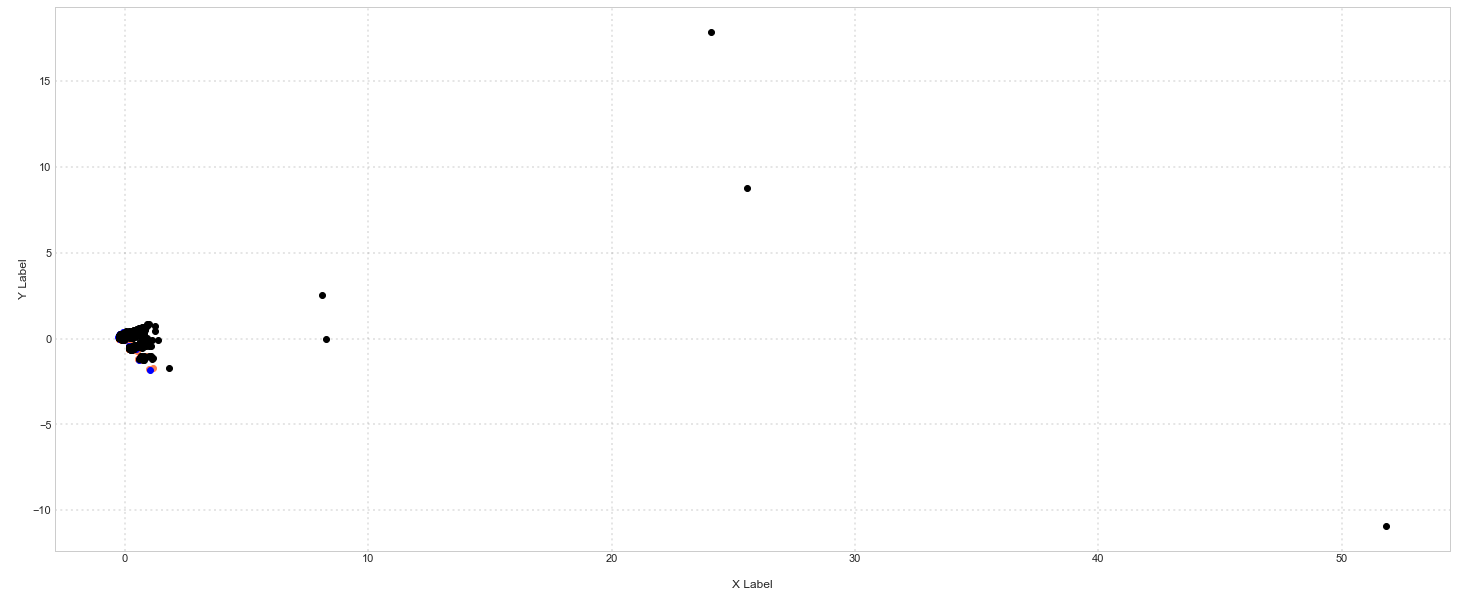

In [436]:
# PCA
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(reviews_counts.toarray())

col = ['coral', 'blue', 'black', 'm']
source = ['Yelp', 'Amazon', 'IMDB']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, s in zip(col, source):
    xs = X_reduced[reviews['Source'] == s].T[0]
    ys = X_reduced[reviews['Source'] == s].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

Based on the 2D visualization above, values mostly overlap and there is barely any separation in the data.

In [457]:
# Discretization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(reviews['Source'])
reviews['bin_Source'] = mlb.transform(reviews['Source']).tolist()

reviews

,Sentence,Sentiment,Source,Unigrams,bin_Source
0,wow loved place,1,Yelp,"[wow, loved, place]","[0, 0, 1]"
1,crust good,0,Yelp,"[crust, good]","[0, 0, 1]"
2,tasty texture wa nasty,0,Yelp,"[tasty, texture, wa, nasty]","[0, 0, 1]"
3,stopped late may bank holiday rick steve recom...,1,Yelp,"[stopped, late, may, bank, holiday, rick, stev...","[0, 0, 1]"
4,selection menu wa great price,1,Yelp,"[selection, menu, wa, great, price]","[0, 0, 1]"
...,...,...,...,...,...
2743,screen doe get smudged easily touch ear face,0,Amazon,"[screen, doe, get, smudged, easily, touch, ear...","[1, 0, 0]"
2744,piece junk lose call phone,0,Amazon,"[piece, junk, lose, call, phone]","[1, 0, 0]"
2745,item doe match picture,0,Amazon,"[item, doe, match, picture]","[1, 0, 0]"
2746,thing disappoint infra red port irda,0,Amazon,"[thing, disappoint, infra, red, port, irda]","[1, 0, 0]"


# Data Exploration

In [427]:
# Getting Cosine Similarity of 3 Random Docs
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

document_to_transform_1 = []
random_record_1 = reviews.iloc[47]
random_record_1 = random_record_1['Sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = reviews.iloc[760]
random_record_2 = random_record_2['Sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = reviews.iloc[2744]
random_record_3 = random_record_3['Sentence']
document_to_transform_3.append(random_record_3)


# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

print("Doc 1:", document_to_transform_1)
print("Doc 2:", document_to_transform_2)
print("Doc 3:", document_to_transform_3)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

reviews.to_csv("test.csv")

Doc 1: ['burger good beef cooked right']
Doc 2: ['food wa good service wa good price good']
Doc 3: ['piece junk lose call phone']
Cosine Similarity using count bw 1 and 2: 0.335410
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


## Part 3

## Data Visualization

In [172]:
# import necessary libraries
import scattertext as st
import spacy
from pprint import pprint
from IPython.core.display import display, HTML
from IPython.display import IFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Visualization 1: positive negative scatter word
# Turn it into a Scattertext Corpus 
# takes a few minutes
nlp = spacy.load('en')
corpus = st.CorpusFromPandas(reviews, 
                            category_col='Sentiment', 
                              text_col='Sentence',
                              nlp=nlp).build()

# create visualization
html = st.produce_scattertext_explorer(corpus,
          category="1", category_name='Positive', not_category_name='Negative', term_scorer = st.CredTFIDF(corpus))

open("New_Data.html", 'wb').write(html.encode('utf-8'))
IFrame(src='New_Data.html', width = 1000, height=700)
# Please open New_Data.html in a separate browser window if you want to use search.

Our Scatter Text above gives us the following insights:
    1. Ratio of number of positive to negative docs is almost 1:1
    2. Top 5 words used in positive review are: great, good, nice, excellent, love; while top 5 negative are: bad, nt, worst, do, don't. 
    3. 3 of the top 5 "Positive" terms and 3 of the top 5 "Negative" terms are on the upper right of the graph, i.e. have relatively high frequency in both positive and negative reviews. This cautions us that just because that word shows up in a document, that does not automatically mean it is classified as positive/negative as it is used in both types of reviews quite frequently in different contexts.
    4. Based on words characteristic to the corpus, we can infer that the reviews are mostly about food (e.g. waitress, steak, burger, sushi)
    5. Terms used frequently in positive reviews, but rarely in negative reviews, include: wonderful, delicious, happy; for the reverse, it is: worst, money, poor. This tells us that for negative reviews particularly, value for money is an important consideration.
    

In [459]:
# Visualization 2: bar chart of sources
import plotly.graph_objects as go
sources = ['Amazon', 'Yelp', 'IMDB']
pos_sen =[ len(reviews[(reviews['Source'] == 'Amazon') & (reviews['Sentiment']=='1')]),
          len(reviews[(reviews['Source'] == 'Yelp') & (reviews['Sentiment']=='1')]),
          len(reviews[(reviews['Source'] == 'IMDB') & (reviews['Sentiment']=='1')])
         ]
neg_sen = [len(reviews[(reviews['Source'] == 'Amazon') & (reviews['Sentiment']=='0')]),
          len(reviews[(reviews['Source'] == 'Yelp') & (reviews['Sentiment']=='0')]),
          len(reviews[(reviews['Source'] == 'IMDB') & (reviews['Sentiment']=='0')])
]

fig = go.Figure(data=[
    go.Bar(name='Positive', x=sources, y=pos_sen), 
    go.Bar(name='Negative', x=sources, y=neg_sen)
])
# Change the bar mode
fig.update_layout(barmode='group', title = 'Distribution of Positive and Negative Reviews Per Source', plot_bgcolor="#fff", bargap=0.5)
fig.show()


Amazon and Yelp have the same number of documents and positive and negative reviews, while IMDB reviews have a slightly higher number of positive reviews than negative ones. However, total number of IMDB reviews is less than both Amazon and Yelp.

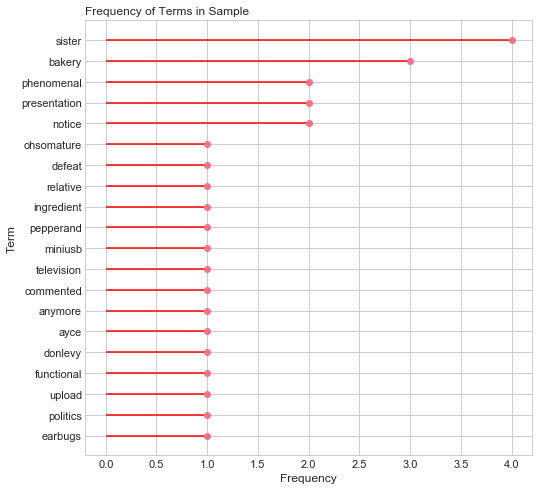

In [401]:
# Visualization 3: Graphing a Sample of Term Frequencies
termfreqsample = termfreq.sample(n=20)

# Sort Highest to Lowest
termfreqsample = termfreqsample.sort_values(by='freq')
my_range=range(1,len(termfreqsample.index)+1)

# Build Chart
plt.hlines(y=my_range, xmin=0, xmax=termfreqsample['freq'], color='red')
plt.style.use('seaborn-whitegrid')

 
# Add titles and axis names
plt.yticks(my_range, termfreqsample['term'])
plt.title("Frequency of Terms in Sample", loc='left')
plt.xlabel('Frequency')
plt.ylabel('Term')
plt.plot(termfreqsample['freq'], my_range, "o")

## TF IDF Vectorizer

In [79]:
# TF IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_feat = vectorizer.fit_transform(reviews["Sentence"])

tfidf_df = pd.DataFrame(tfidf_feat.T.todense(), index=vectorizer.get_feature_names())

In [80]:
tfidf_df
# columns are documents, rows are words, values are tf idf scores

,0,1,2,3,4,5,6,7,8,9,...,2738,2739,2740,2741,2742,2743,2744,2745,2746,2747
010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0again,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0an,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0and,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zillion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zombie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zombiestudents,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
# sample query: show tf idf scores of first document
tfidf_df[tfidf_df[0]>0]

,0,1,2,3,4,5,6,7,8,9,...,2738,2739,2740,2741,2742,2743,2744,2745,2746,2747
loved,0.586853,0.0,0.0,0.261186,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
place,0.412732,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wow,0.696603,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Naive Bayes Classifier

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

sns.set_style = "whitegrid"
sns.set(rc = {"figure.figsize":(5,5)},
           font_scale = 1)

Accuracy Score: 0.7714701601164483


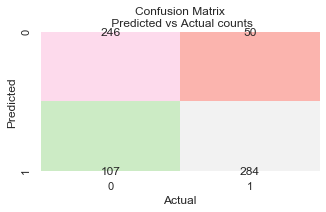

In [241]:
# Bernoulli NB, using TFIDF Features
X_train, X_test, y_train, y_test = train_test_split(tfidf_feat, reviews['Sentiment'], test_size=0.25, random_state=10)

bnbmodel = BernoulliNB(binarize=0.0)
bnbmodel.fit(X_train, y_train)
y_pred = bnbmodel.predict(X_test)

bnbconfusion_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(bnbconfusion_matrix.T, 
               square  = True,
               annot = True,
               fmt = "d",
               cbar = False,
               cmap = "Pastel1")

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix\n Predicted vs Actual counts")

print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.777292576419214


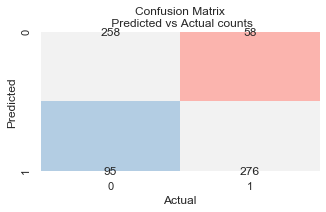

In [240]:
### Multinomial NB, using word frequency features

X_train, X_test, y_train, y_test = train_test_split(reviews_counts, reviews['Sentiment'], test_size=0.25, random_state=10)


mnmodel = MultinomialNB()
mnmodel.fit(X_train, y_train)
y_pred = mnmodel.predict(X_test)


mnconfusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(mnconfusion_matrix.T, 
               square  = True,
               annot = True,
               fmt = "d",
               cbar = False,
               cmap = "Pastel1")

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix\n Predicted vs Actual counts")

print('Accuracy Score:', accuracy_score(y_test, y_pred))

# Answer
I applied two kinds of Naive Bayes Classifiers: the Bernoulli Naive Bayes Classifier on the TF IDF Features and the Multinomial Naive Bayes Classifier on the Word Frequency Features. Here are the observed differences:

1. Bernoulli Naive Bayes is useful for when features can only have 2 values (0 or 1). In the example here we can take Sentiment Score as the feature, as it is only 1 (Positive) or 0 (Negative). On the other hand, Multinomial Naive Bayes is more useful when dealing with vectors that represent frequencies (hence the use of the word frequency features for this model).
2. Multinomial Naive Bayes has a slightly highly accuracy score than the Bernoulli Naive Bayes. Its score is .0058224163 higher.
3. Looking at the confusion matrix of the 2, we can see that the Multinomial classifier had more accurate predictions (534 true positives and true negatives total) vs Bernoulli (530). However, the Bernoulli classifier was able to generate more true negative predictions while the Multinomial classifier was able to generate more true positive predictions. On the other hand, the Bernoulli classifier had more false negatives while the Multinomial classifier had more false positives.

Legend:
true positive = upper left box, <br/>
true negative = lower right box, <br/>
false positive = upper right box, <br/>
false negative = lower left box

# Part Four
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

<b> TWENTY TRAINS DATASET </b>
1. Category and Category Name Columns are Redundant, as they both refer to the same thing but in different ways. We can just choose one of these columns for less redundancy.
2. We need to clean the data set early on (e.g. remove stopwords) so we can perform more relevant analysis later. During the first few parts of preprocessing we didn't really do proper cleaning of the unigrams, hence a really large matrix with sparse values.
3. In the Attribute Transformation section, the for loop that does the loading term frequencies takes long to load. We can perform further cleaning to remove and aggregate some irrelevant words, or pick a smaller sample size.
4. Some charts, such as the bar chart of 300 terms, is visually hard to understand (e.g. too many bars to help provide insight, too small). We can pick a better way to visualize by choosing a better type of visualization (e.g. scatter plot or heatmap if we are using lots of features) or reduce the sample size.

<b> SENTIMENT LABELLED SENTENCES </b>
1. After checking for duplicates, even if duplicates were detected, I chose not to eliminate duplicates as I found this was not ideal for this dataset. This is because of the nature of the data - it is plausible that similarly worded reviews are given by different people, and removing duplicates in this case might actually compromise the integrity of the data.
2. Only basic text cleaning was done here (lowercasing, removing symbols, lemmatizing, removing stop words). For more quality data, we can do more advanced preprocessing such as Part of Speech Tagging, Named Entity Recognition, and Coreference Resolution.